# Task 3

## By: Ahmed Eraki
## Mail : ahmedmohamed9667@gmail.com

####  Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the bank marketing dataset from the UCI machine learning repository

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ahmed9667/PRODIGY-Data-Science-Internship/main/PRODIGY_DS_03/bank-additional.csv'
                ,delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
# we will rename column y because it is the independat variable we will use
df.rename(columns={'y':'deposit'} , inplace=True)

In [5]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


# check for null values

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

There are no null values

# Check the types of data

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [8]:
objective_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtypes == 'object':
        objective_columns.append(i)
    else:
        numerical_columns.append(i)

In [9]:
print('Columns with objective values: \n',objective_columns)

Columns with objective values: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


In [10]:
print('Columns with numerical values: \n',numerical_columns)

Columns with numerical values: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [11]:
number_of_unique_values = []
for i in objective_columns :
    number_of_unique_values.append(len(df[i].unique()))
    
print(pd.DataFrame({"column":objective_columns , "No of unique values":number_of_unique_values}))

         column  No of unique values
0           job                   12
1       marital                    4
2     education                    8
3       default                    3
4       housing                    3
5          loan                    3
6       contact                    2
7         month                   10
8   day_of_week                    5
9      poutcome                    3
10      deposit                    2


# Checking for outliers

we will check outliers of numerical columns as we can not delete outliers outlier of categorical data to avoid any further skewness

In [12]:
len(numerical_columns)

10

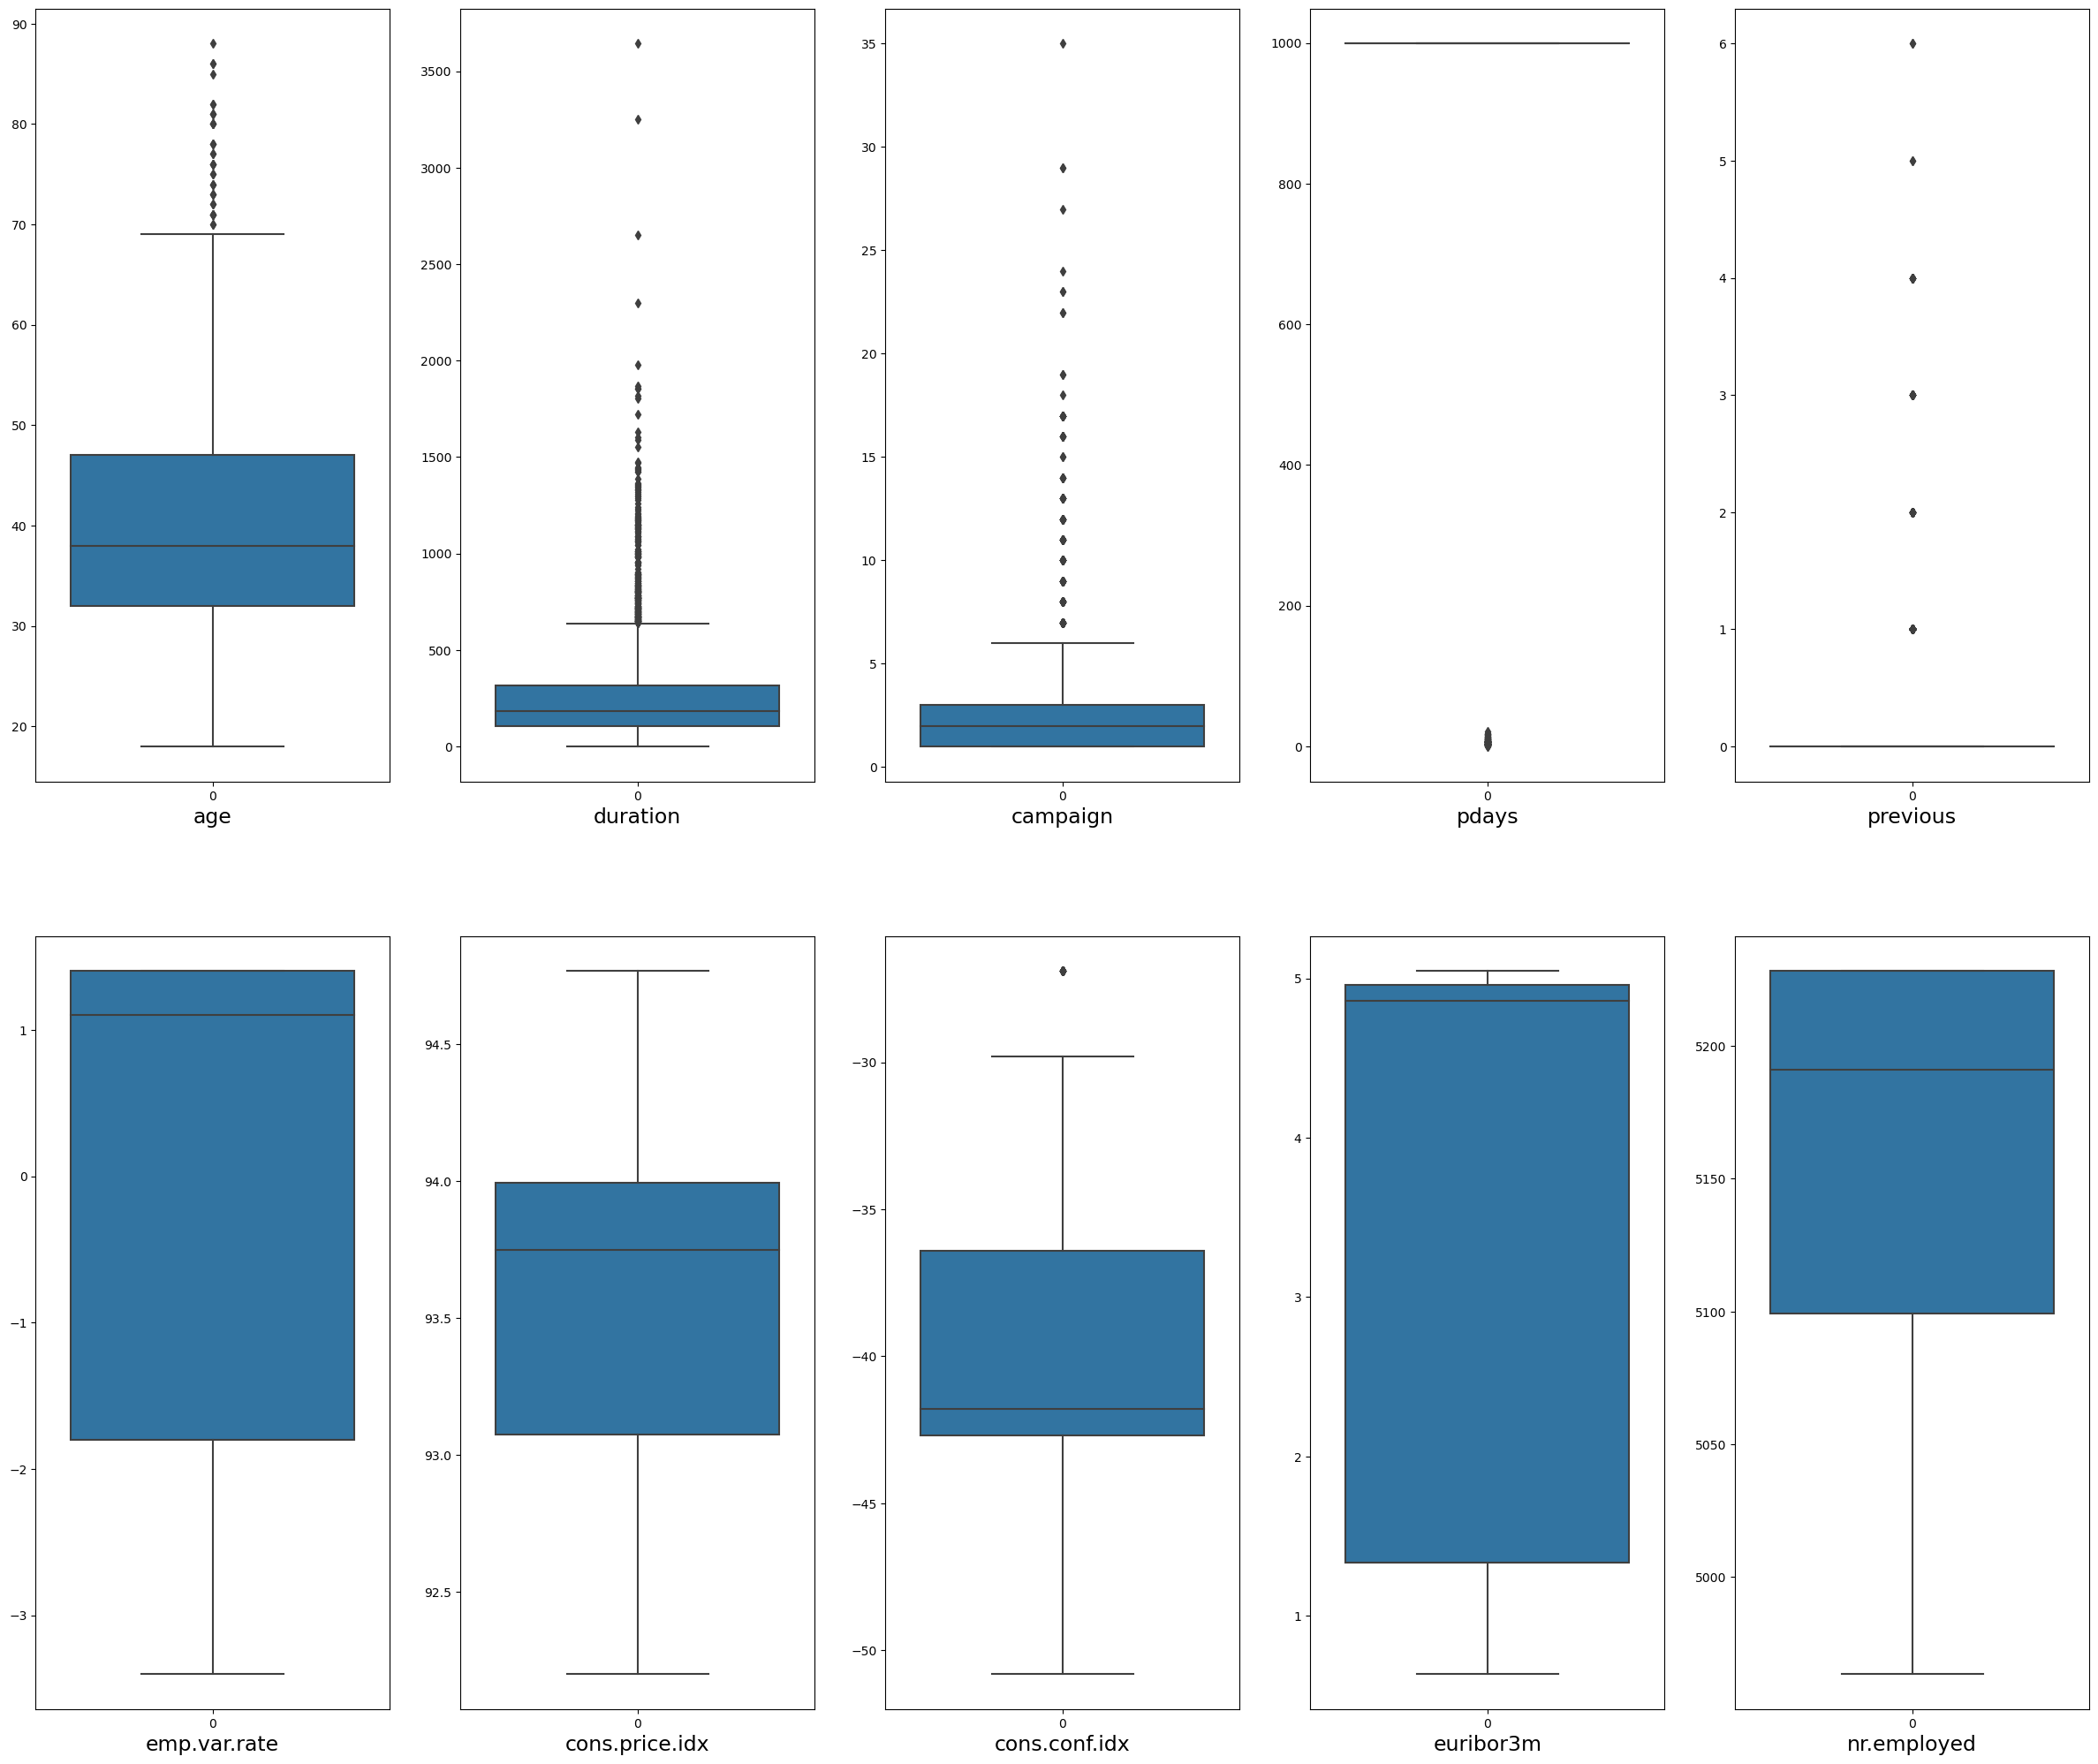

In [13]:
plt.figure(figsize=(30,25))
plot = 1
for i in numerical_columns :
    if plot <= 10:
        ax = plt.subplot(2,5,plot)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=17)
    plot +=1
plt.show()    
        

columns age , duration , campaign have outliers se we have to remove them

In [14]:
# zscore method
from scipy.stats import zscore

In [15]:
outliers = df[['age', 'duration', 'campaign']]
z = np.abs(zscore(outliers))

In [16]:
df1 = df[(z<3).all(axis=1)]

In [17]:
print('shape of original data :',df.shape)
print('shape of modified data :',df1.shape)

shape of original data : (4119, 21)
shape of modified data : (3914, 21)


In [18]:
print('Percentage of loss is : ',((df.shape[0] - df1.shape[0])/df.shape[0])*100,' %')

Percentage of loss is :  4.976936149550862  %


In [19]:
# IQR method
out = df[['age', 'duration', 'campaign']]
q1 = out.quantile(0.25)
q3 = out.quantile(0.75)
IQR = q3 - q1

df2 = df[~((df<(q1 - 1.5*IQR))|(df>(q3 + 1.5*IQR))).any(axis=1)]

In [20]:
print('shape of original data :',df.shape)
print('shape of modified data :',df2.shape)

shape of original data : (4119, 21)
shape of modified data : (3569, 21)


In [21]:
print('Percentage of loss is : ',((df.shape[0] - df2.shape[0])/df.shape[0])*100,' %')

Percentage of loss is :  13.35275552318524  %


IQR is the better method because it removed more outliers so we will use its new dataset

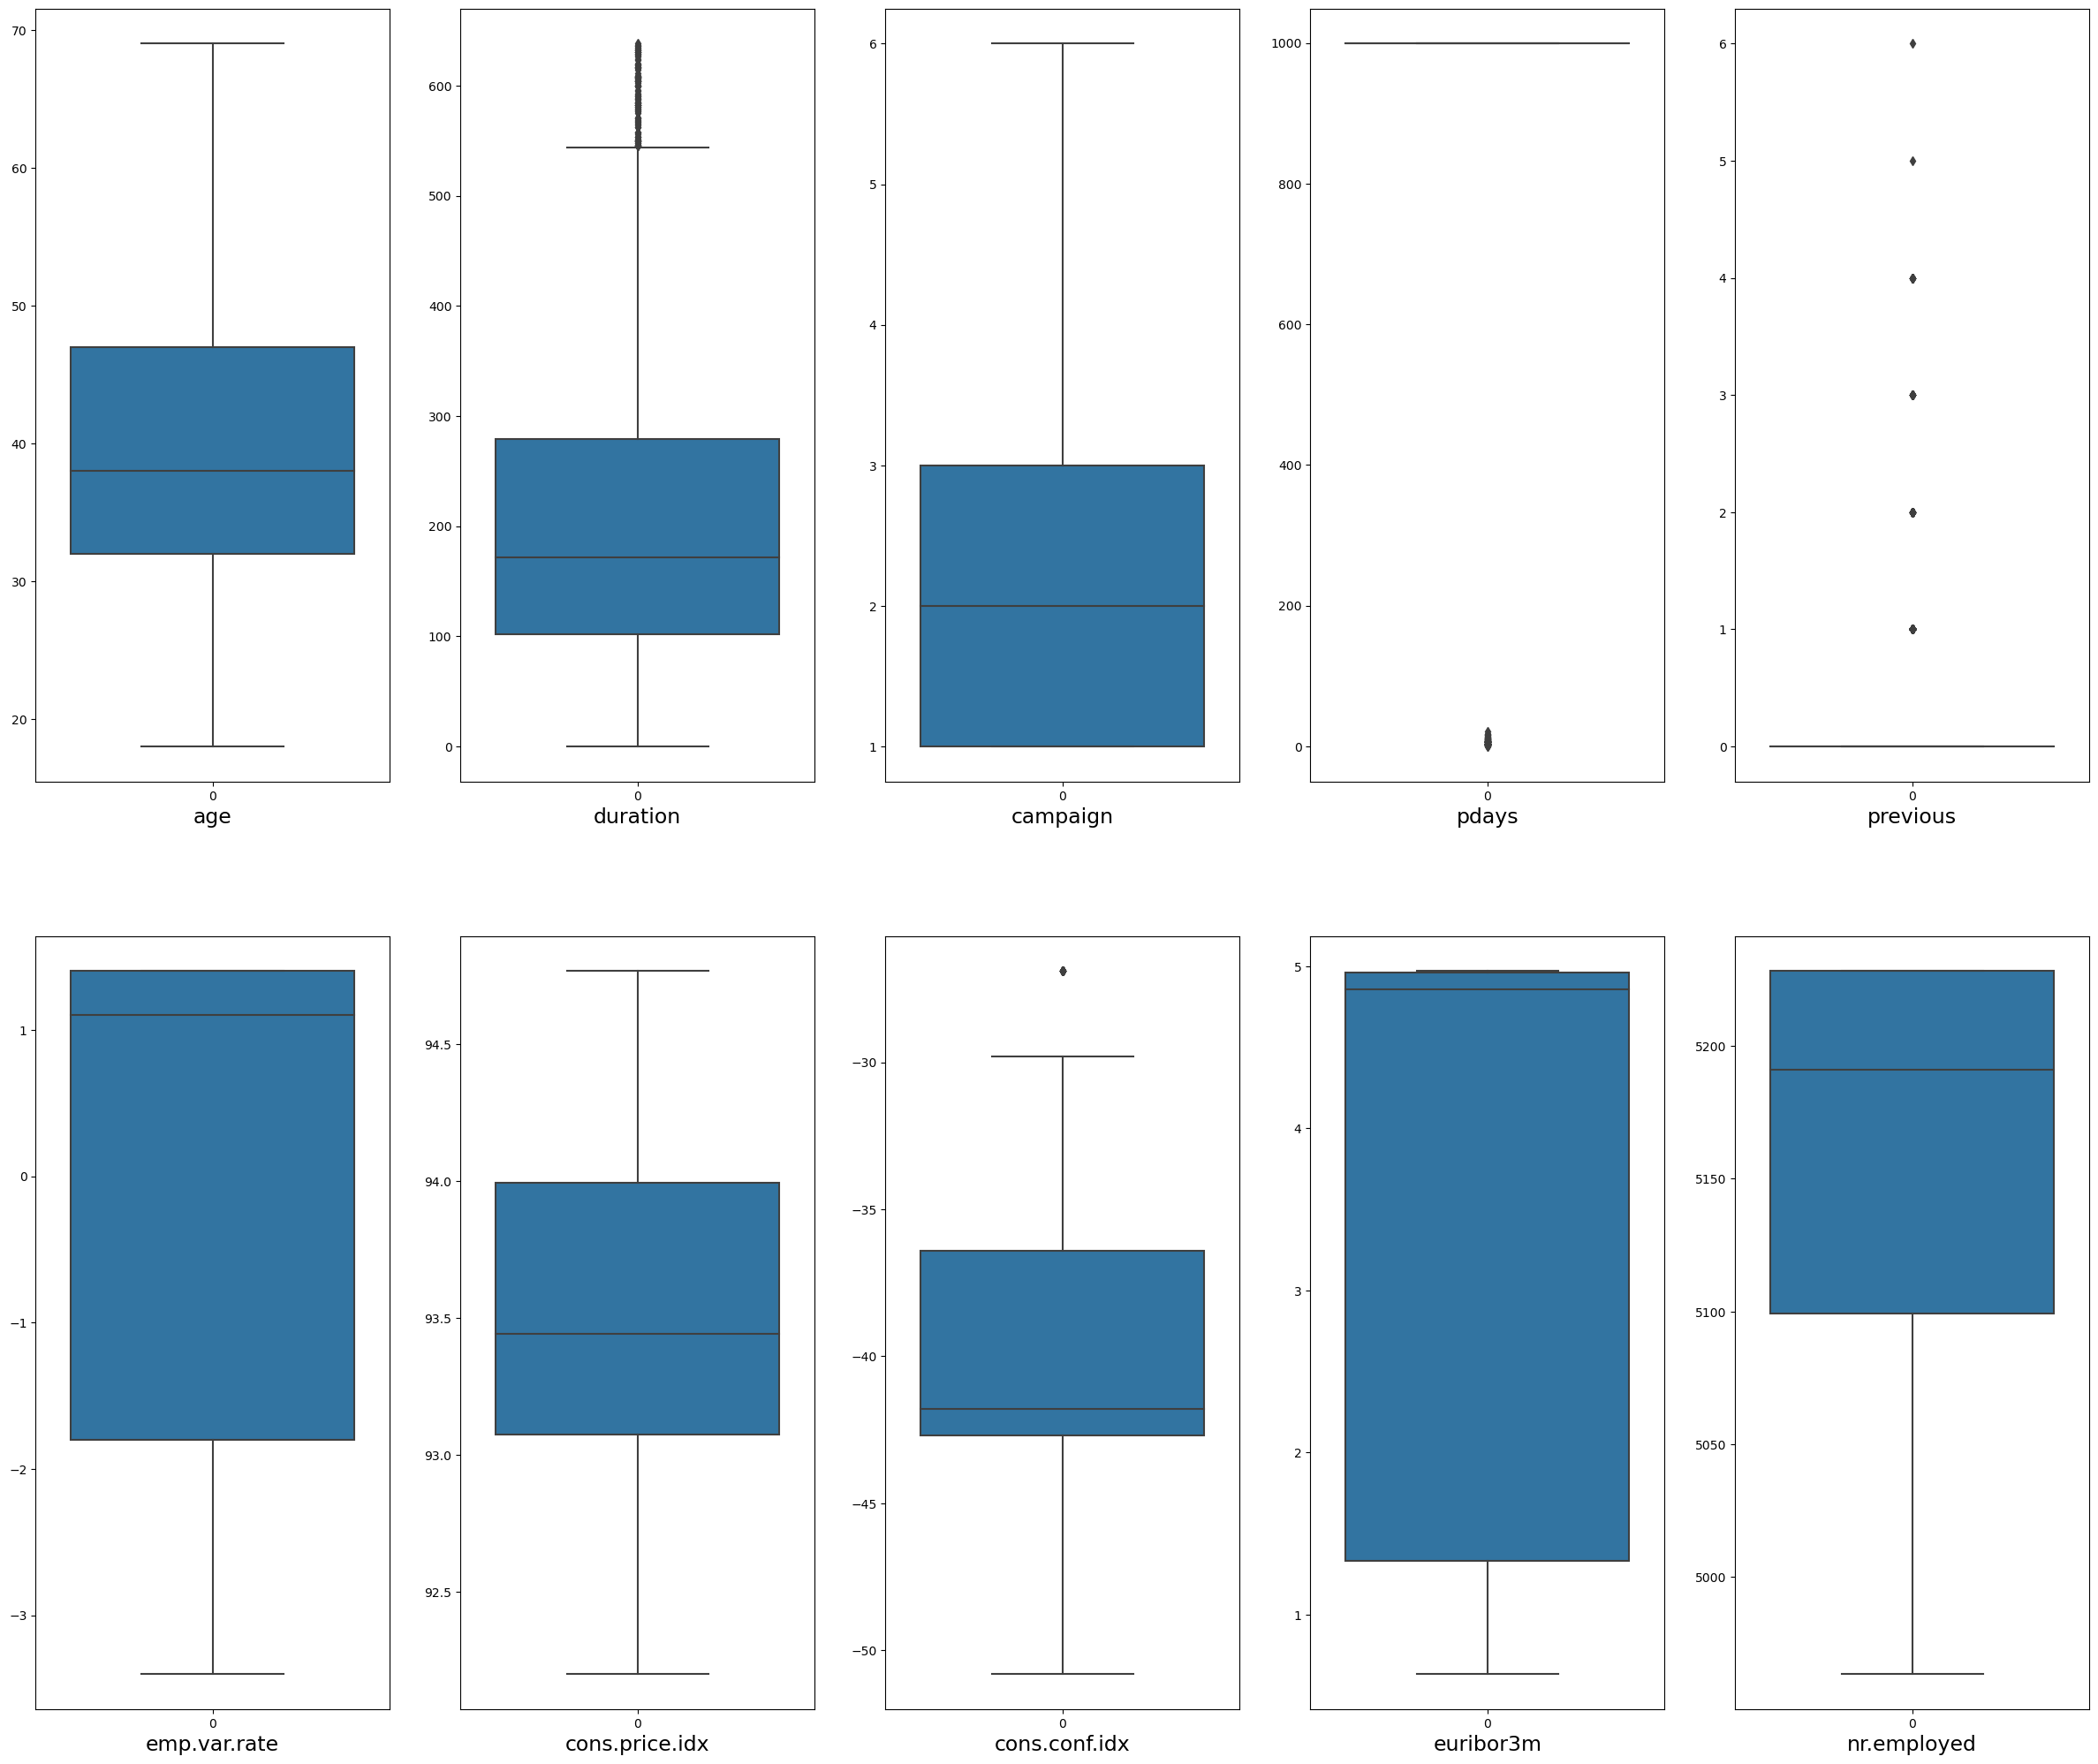

In [22]:
# Now let us check the outliers
plt.figure(figsize=(30,25))
plot = 1
for i in numerical_columns :
    if plot <= 10:
        ax = plt.subplot(2,5,plot)
        sns.boxplot(df2[i])
        plt.xlabel(i,fontsize=17)
    plot +=1
plt.show()    
        

We removed outliers as possible as we could

# Skewness

In [23]:
df2.skew()

age               0.437508
duration          1.025707
campaign          1.292850
pdays            -4.847396
previous          3.791227
emp.var.rate     -0.690800
cons.price.idx   -0.186969
cons.conf.idx     0.298512
euribor3m        -0.683113
nr.employed      -1.047441
dtype: float64

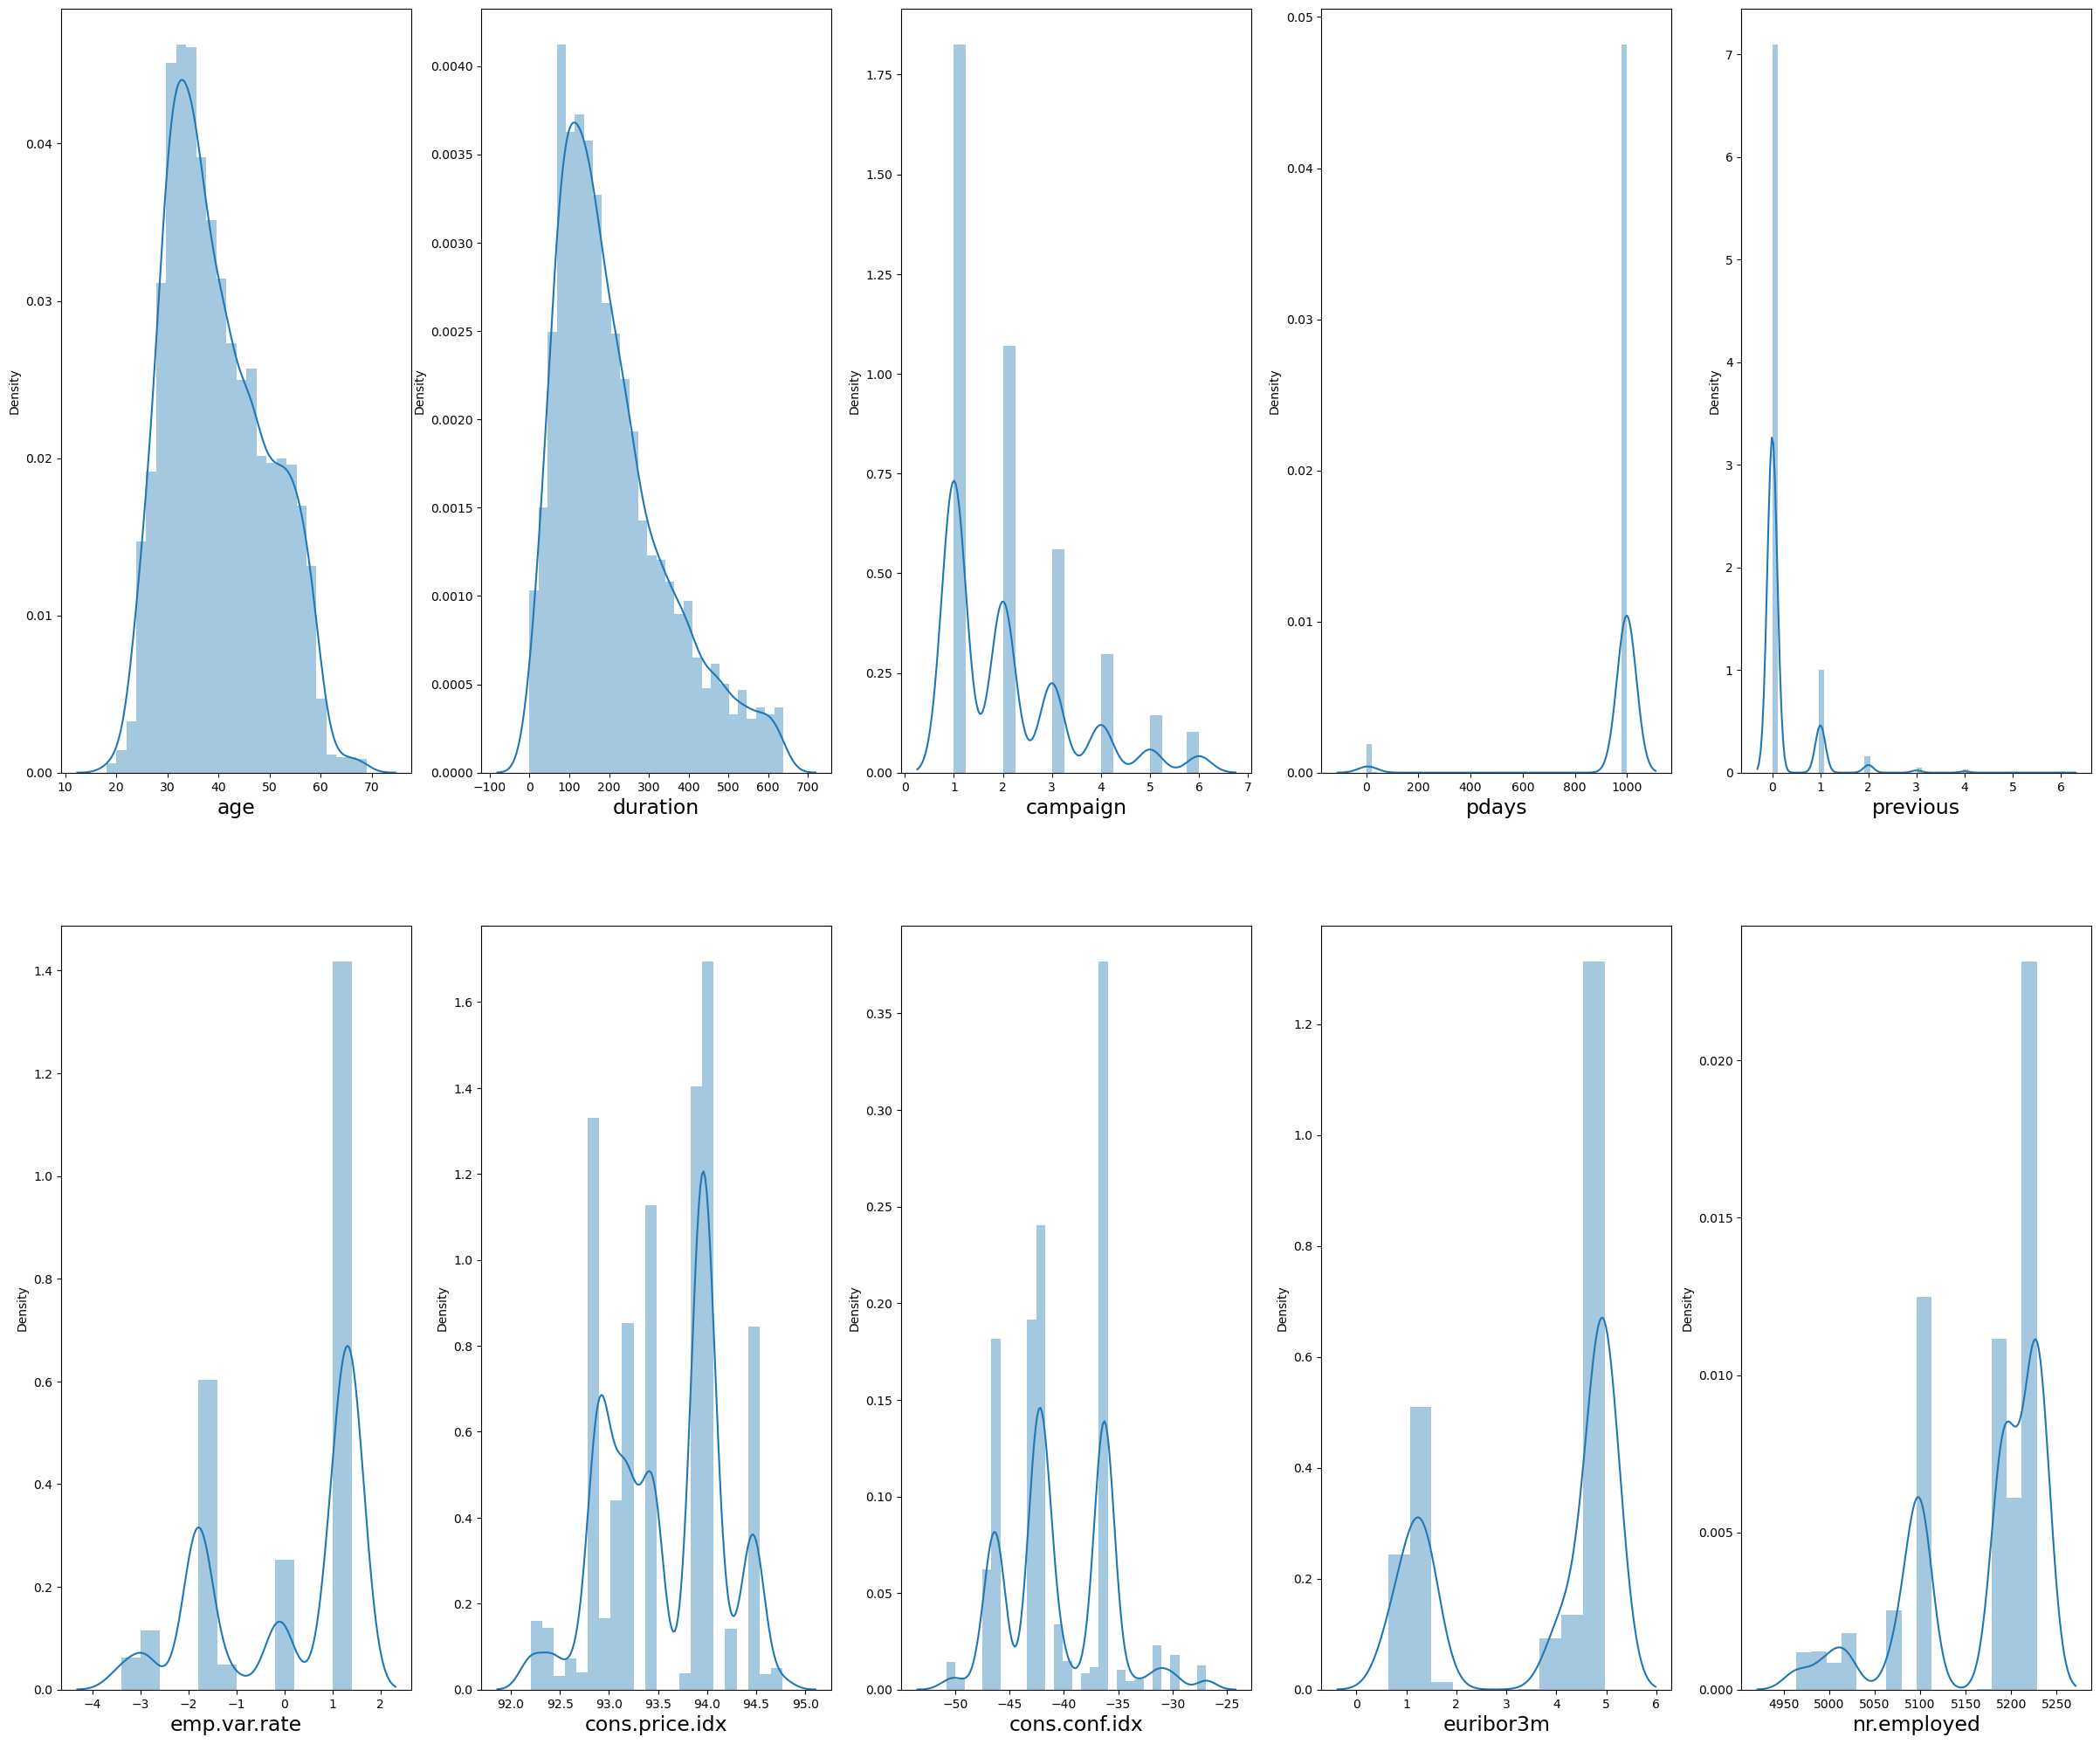

In [24]:
# Now let us check the skewness
plt.figure(figsize=(30,25))
plot = 1
for i in numerical_columns :
    if plot <= 10:
        ax = plt.subplot(2,5,plot)
        sns.distplot(df2[i])
        plt.xlabel(i,fontsize=17)
    plot +=1
plt.show()    
        

Data is distributed normally and not skewed so no need to modify it

# Correlation

In [25]:
print('Columns with objective values: \n',objective_columns)

Columns with objective values: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


we need to convert object into integer values to shape correlation

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
for i in objective_columns :
    df2[i] = le.fit_transform(df2[i])

In [28]:
df2.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3569 non-null   int64  
 1   job             3569 non-null   int32  
 2   marital         3569 non-null   int32  
 3   education       3569 non-null   int32  
 4   default         3569 non-null   int32  
 5   housing         3569 non-null   int32  
 6   loan            3569 non-null   int32  
 7   contact         3569 non-null   int32  
 8   month           3569 non-null   int32  
 9   day_of_week     3569 non-null   int32  
 10  duration        3569 non-null   int64  
 11  campaign        3569 non-null   int64  
 12  pdays           3569 non-null   int64  
 13  previous        3569 non-null   int64  
 14  poutcome        3569 non-null   int32  
 15  emp.var.rate    3569 non-null   float64
 16  cons.price.idx  3569 non-null   float64
 17  cons.conf.idx   3569 non-null   f

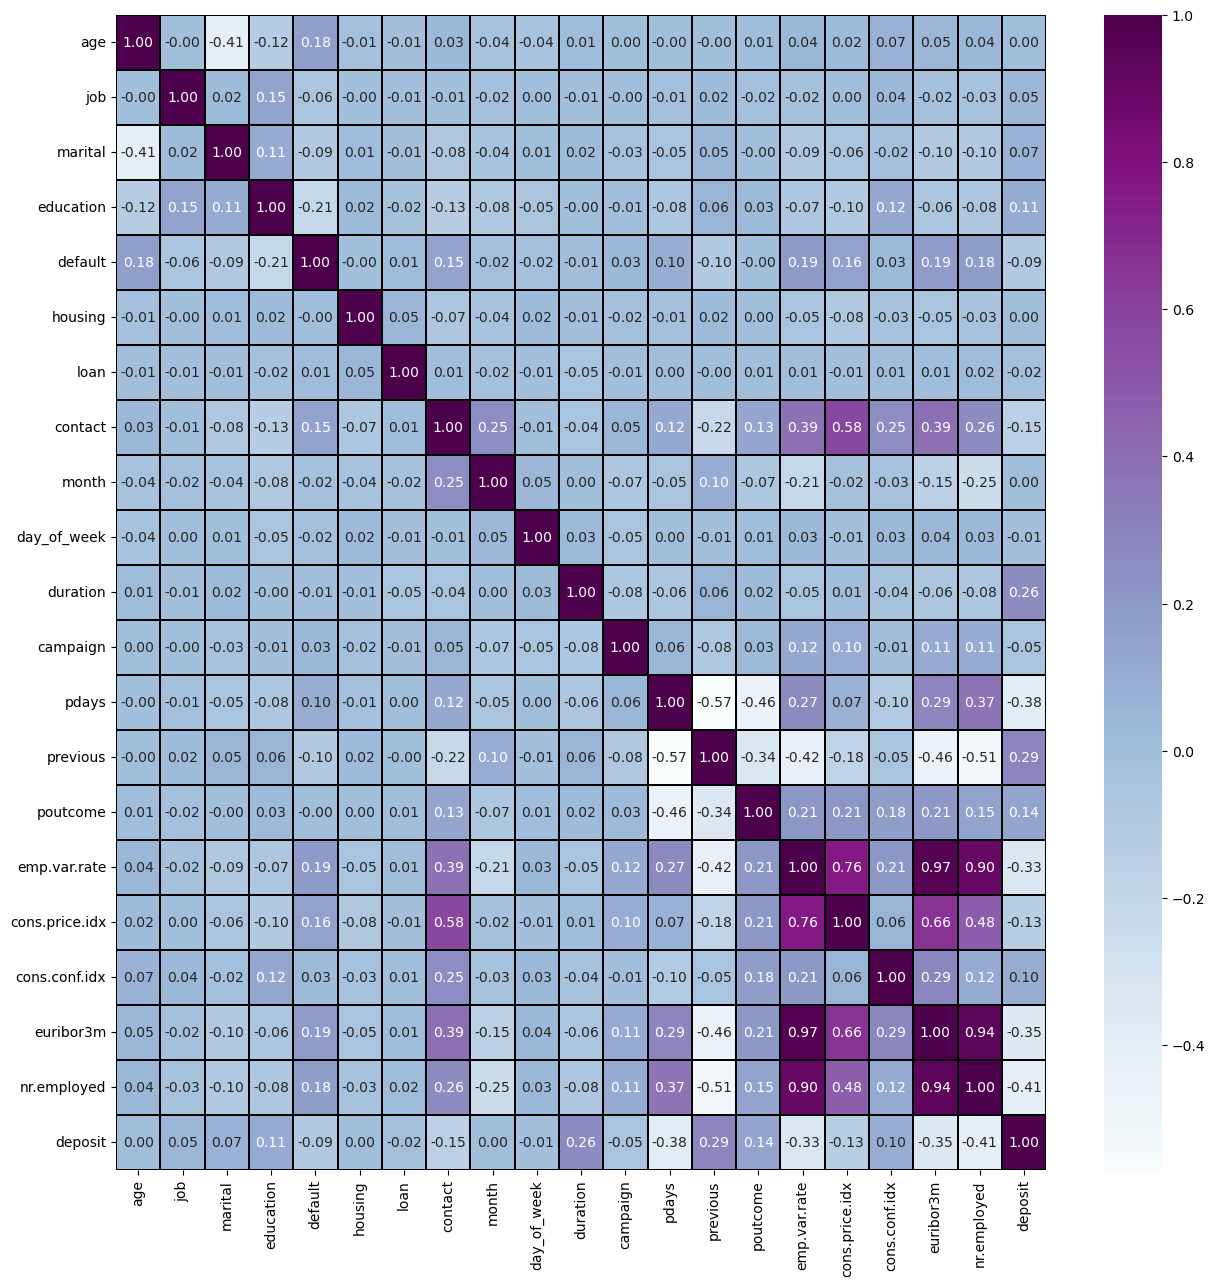

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), annot=True , linewidth=0.1 , cmap='BuPu', fmt='.2f' , linecolor='black')
plt.show()

In [31]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

- Columns 'euribor3m', 'nr.employed' , 'emp.var.rate' are highly correlated together so we will delete them to avoid multicollinearity
- Target variable depost lowly correlated with other variables

In [32]:
df2 = df2.drop(['euribor3m', 'nr.employed' , 'emp.var.rate'] , axis = 1)

In [33]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,30,1,1,2,0,2,0,0,6,0,487,2,999,0,1,92.893,-46.2,0
1,39,7,2,3,0,0,0,1,6,0,346,4,999,0,1,93.994,-36.4,0
2,25,7,1,3,0,2,0,1,4,4,227,1,999,0,1,94.465,-41.8,0
3,38,7,1,2,0,1,1,1,4,0,17,3,999,0,1,94.465,-41.8,0
4,47,0,1,6,0,2,0,0,7,1,58,1,999,0,1,93.200,-42.0,0


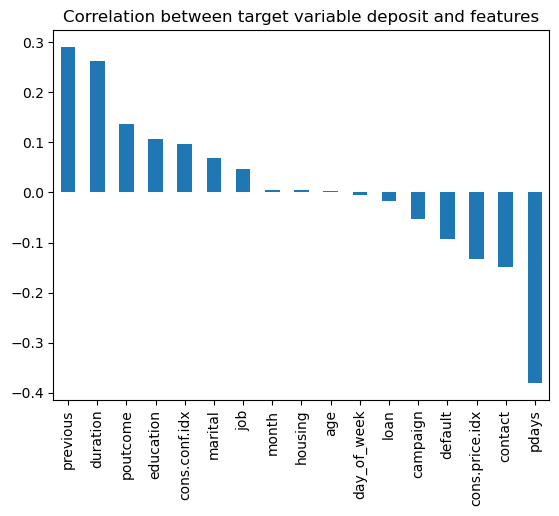

In [34]:
df2.corr()['deposit'].sort_values(ascending=False).drop('deposit').plot(kind='bar')
plt.title('Correlation between target variable deposit and features')
plt.show()

Target variable deposit is highly negatively correlated with pdays

In [35]:
print(df2['deposit'].value_counts())

0    3291
1     278
Name: deposit, dtype: int64


In [36]:
x = df2.drop('deposit' , axis=1) #independat variables
y = df2['deposit'] # target variables

# Scaling Data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
x_scaler = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaler , columns = x.columns)
x_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx
0,-0.999136,-0.780826,-0.300015,-0.827770,-0.490879,0.930579,-0.472277,-0.734184,0.723261,-1.449963,2.011450,-0.034676,0.198273,-0.362010,0.215281,-1.161920,-1.228998
1,-0.068978,0.878623,1.357497,-0.360463,-0.490879,-1.103246,-0.472277,1.362057,0.723261,-1.449963,0.996462,1.531907,0.198273,-0.362010,0.215281,0.742261,0.897753
2,-1.515890,0.878623,-0.300015,-0.360463,-0.490879,0.930579,-0.472277,1.362057,-0.140056,1.425790,0.139841,-0.817968,0.198273,-0.362010,0.215281,1.556856,-0.274130
3,-0.172329,0.878623,-0.300015,-0.827770,-0.490879,-0.086334,0.871868,1.362057,-0.140056,-1.449963,-1.371843,0.748615,0.198273,-0.362010,0.215281,1.556856,-0.274130
4,0.757829,-1.057401,-0.300015,1.041455,-0.490879,0.930579,-0.472277,-0.734184,1.154920,-0.731025,-1.076705,-0.817968,0.198273,-0.362010,0.215281,-0.630963,-0.317533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,-0.999136,-1.057401,-0.300015,-1.295076,-0.490879,0.930579,2.216013,-0.734184,-0.571715,-0.012086,-1.112697,-0.817968,0.198273,-0.362010,0.215281,0.610819,-0.469444
3565,-0.068978,-1.057401,-0.300015,-0.360463,-0.490879,0.930579,-0.472277,1.362057,-0.571715,-1.449963,0.082253,-0.817968,0.198273,-0.362010,0.215281,0.610819,-0.469444
3566,-1.309188,1.155198,1.357497,-0.360463,-0.490879,-1.103246,-0.472277,-0.734184,0.723261,-0.731025,-1.033514,-0.034676,0.198273,1.521393,-2.434165,-1.161920,-1.228998
3567,1.894689,-1.057401,-0.300015,-0.360463,-0.490879,-1.103246,-0.472277,-0.734184,-1.435032,-1.449963,2.306588,-0.817968,0.198273,-0.362010,0.215281,-0.208965,0.962857


# Check Variance Inflation Factor

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['column'] = x_scaled.columns
vif

,vif,column
0,1.250666,age
1,1.025589,job
2,1.216882,marital
3,1.130108,education
4,1.109068,default
5,1.014434,housing
6,1.007411,loan
7,1.935470,contact
8,1.187830,month
9,1.014118,day_of_week


All values are lower than 10 so there is no multi collinearity problem

# Over Sampling

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [42]:
x1 , y1 = sm.fit_resample( x , y)

In [43]:
print('new varible unique values count are :\n ',y1.value_counts())
print('shape of new variable : ',y1.shape)
print('shape of new features : ',x1.shape)

new varible unique values count are :
  0    3291
1    3291
Name: deposit, dtype: int64
shape of new variable :  (6582,)
shape of new features :  (6582, 17)


# Building Model

In [47]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve

In [48]:
accuracy = []
stats = []
dt = DecisionTreeClassifier()
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=i)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    accuracy.append(accu)
    stats.append(i)

In [49]:
my_accuracy = pd.DataFrame()
my_accuracy['accuracy'] = accuracy
my_accuracy['no of stats'] = stats
my_accuracy[my_accuracy['accuracy'] == my_accuracy['accuracy'].max()]

,accuracy,no of stats
47,0.953924,48


Best accuracy is 95.39 % when number of random states is 48

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=48)

In [53]:
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)
y_pred_train = dt.predict(x_train)
accuracy = accuracy_score(y_test,y_pred)
accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy test score is : ','{:.2f}'.format(accuracy*100),' %')
print('accuracy train score is : ','{:.2f}'.format(accuracy_train*100),' %')
print('confusion matrix is\n',confusion_matrix(y_test,y_pred))
print('classification report ',classification_report(y_test,y_pred))

accuracy test score is :  95.39  %
accuracy train score is :  100.00  %
confusion matrix is
 [[928  39]
 [ 52 956]]
classification report                precision    recall  f1-score   support

           0       0.95      0.96      0.95       967
           1       0.96      0.95      0.95      1008

    accuracy                           0.95      1975
   macro avg       0.95      0.95      0.95      1975
weighted avg       0.95      0.95      0.95      1975



In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, x_train, y_train, cv=10) 
scores

array([0.94577007, 0.93058568, 0.93926247, 0.94143167, 0.96529284,
       0.95444685, 0.9197397 , 0.9173913 , 0.96956522, 0.95652174])

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, x_train, y_train, cv=5) 
scores

array([0.94360087, 0.94468547, 0.94896851, 0.92399566, 0.94896851])

When the accuracy score of training model is 100 %  so the model is overfitting

In [57]:
from sklearn.metrics import roc_auc_score , auc

In [58]:
fpr ,tpr , thresold = roc_curve(y_test , y_pred)
print('accuracy score of fpr , tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
print('Flase positive rate is ',fpr)
print('True positive rate is ',tpr)
print('Thresold is ',thresold)

accuracy score of fpr , tpr is  95.40  %
Flase positive rate is  [0.         0.04033092 1.        ]
True positive rate is  [0.        0.9484127 1.       ]
Thresold is  [2 1 0]


accuracy score of fpr , tpr is  95.40  %


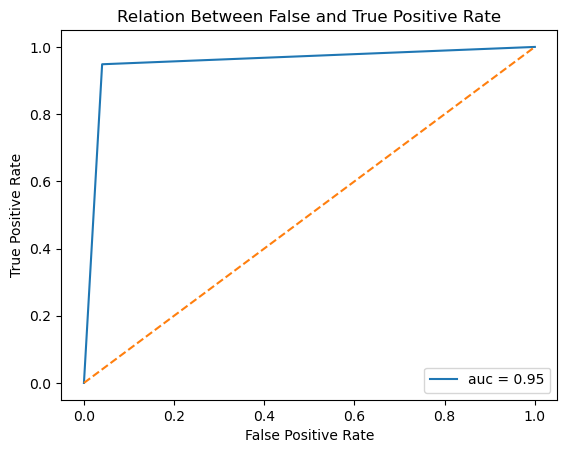

In [59]:
print('accuracy score of fpr , tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
plt.plot(fpr,tpr, label='auc = {:.2f}'.format(roc_auc_score(y_test,y_pred)))
plt.plot([0,1],[0,1],linestyle='--' )
plt.title('Relation Between False and True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Prediction

In [60]:
predict = pd.DataFrame()
predict['actual'] = y_test
predict['predicted'] = y_pred
predict

,actual,predicted
3837,1,1
4445,1,1
4465,1,1
4311,1,1
918,0,0
...,...,...
5317,1,1
2356,0,0
3674,1,1
2848,0,0


In [64]:
df2.iloc[355].values

array([ 35. ,   1. ,   1. ,   1. ,   0. ,   2. ,   0. ,   0. ,   7. ,
         3. , 372. ,   2. , 999. ,   0. ,   1. ,  93.2, -42. ,   0. ])

In [67]:
potential = dt.predict(scaler.transform([[ 35. ,   1. ,   1. ,   1. ,   0. ,   2. ,   0. ,   0. ,   7. ,
         3. , 372. ,   2. , 999. ,   0. ,   1. ,  93.2, -42.  ]]))

if potential == 0 :
    print('No')
else:
    print('Yes')

No


In [68]:
from sklearn.tree import plot_tree

In [69]:
print(df2['deposit'].value_counts())

0    3291
1     278
Name: deposit, dtype: int64


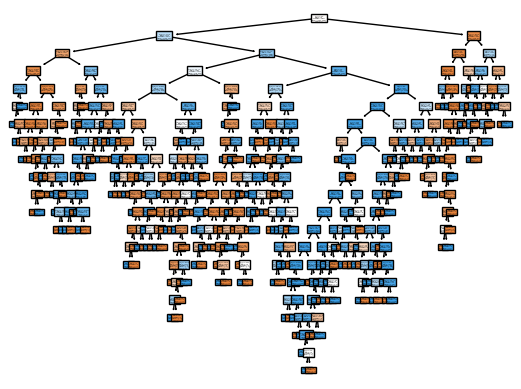

In [70]:
plot_tree(dt , class_names = ['no','yes'] , filled = True)
plt.show()

# Hyperparameter

In [73]:
from sklearn.model_selection import train_test_split , GridSearchCV

In [74]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [75]:
grid_para = {'criterion':['gini','entropy'] ,
             'max_depth':range(10,15), #the maximum depth of tree
              'min_samples_leaf':range(2,6), #the minimum number of samples required to be at a leaf nod
             'min_samples_split':range(3,8), #the minimum number of samples required to split on internal code
             'max_leaf_nodes':range(5,10)}    #best nodes are defined as relative reduction in impurity

In [76]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid_para , cv=5 , n_jobs = -1)

In [77]:
grid_search.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [78]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [80]:
# modify the estimator
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 9, min_samples_leaf= 2, min_samples_split= 3)
clf.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=3)

In [81]:
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
y_pred_train = clf.predict(x_train)
accuracy = accuracy_score(y_test,y_pred)
accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy test score is : ','{:.2f}'.format(accuracy*100),' %')
print('accuracy train score is : ','{:.2f}'.format(accuracy_train*100),' %')
print('confusion matrix is\n',confusion_matrix(y_test,y_pred))
print('classification report ',classification_report(y_test,y_pred))

accuracy test score is :  87.90  %
accuracy train score is :  86.98  %
confusion matrix is
 [[906  61]
 [178 830]]
classification report                precision    recall  f1-score   support

           0       0.84      0.94      0.88       967
           1       0.93      0.82      0.87      1008

    accuracy                           0.88      1975
   macro avg       0.88      0.88      0.88      1975
weighted avg       0.88      0.88      0.88      1975



In [82]:
fpr ,tpr , thresold = roc_curve(y_test , y_pred)
print('accuracy score of fpr , tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
print('Flase positive rate is ',fpr)
print('True positive rate is ',tpr)
print('Thresold is ',thresold)

accuracy score of fpr , tpr is  88.02  %
Flase positive rate is  [0.        0.0630817 1.       ]
True positive rate is  [0.        0.8234127 1.       ]
Thresold is  [2 1 0]


accuracy score of fpr , tpr is  88.02  %


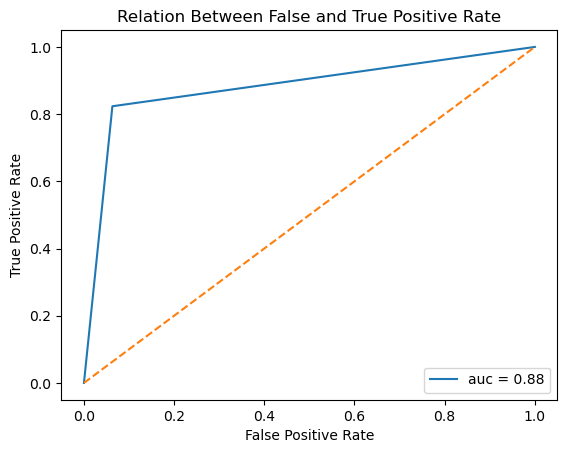

In [83]:
print('accuracy score of fpr , tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
plt.plot(fpr,tpr, label='auc = {:.2f}'.format(roc_auc_score(y_test,y_pred)))
plt.plot([0,1],[0,1],linestyle='--' )
plt.title('Relation Between False and True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [84]:
predict = pd.DataFrame()
predict['actual'] = y_test
predict['predicted'] = y_pred
predict

,actual,predicted
3837,1,1
4445,1,1
4465,1,1
4311,1,1
918,0,0
...,...,...
5317,1,1
2356,0,0
3674,1,0
2848,0,0


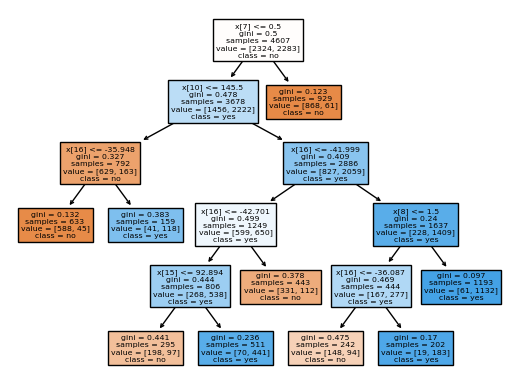

In [85]:
plot_tree(clf , class_names = ['no','yes'] , filled = True)
plt.show()